In [34]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra

# Import for Viusalization
import seaborn as sns
import matplotlib.pyplot as plt




In [5]:
df = pd.read_csv('C:/Users/chami/Downloads/MissingMigrants_Global_2022.csv')


In [7]:
df.head()

,Main ID,Incident ID,Region,Incident Date,Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location of death,Information Source,Coordinates,Migrantion route,UNSD Geographical Grouping
0,2022.MMP00001,2022.MMP00001,Mediterranean,"Sun, 01/02/2022 - 12:00",2022,January,1.0,NaN,1,NaN,NaN,NaN,1.0,Drowning,"Retrieved from waters one mile off Aftis, El A...",DPC Jijel,"36.71614878, 5.552716421",Western Mediterranean,Uncategorized
1,2022.MMP00002,2022.MMP00002,Mediterranean,"Mon, 01/03/2022 - 12:00",2022,January,3.0,8.0,11,3.0,NaN,NaN,NaN,Drowning,"Off Plage Ben Zouit, Kerkera, Skikda, Algeria ...","DPC Skkikda, Echorouk Online, Akher Saa","36.97321267, 6.599006494",Central Mediterranean,Uncategorized
2,2022.MMP00003,2022.MMP00003,Southern Africa,"Mon, 01/03/2022 - 12:00",2022,January,3.0,3.0,6,2.0,NaN,6.0,NaN,Drowning,"Limpopo river, near Maroi, Limpopo province, S...",IOM Zimbabwe,"-22.177258, 29.862273",NaN,Uncategorized
3,2022.MMP00004,2022.MMP00004,Mediterranean,"Mon, 01/03/2022 - 12:00",2022,January,3.0,14.0,17,16.0,1.0,NaN,1.0,Drowning,"Off the coast of Cabo de Gata, Almería, Spain","IOM Spain, El País, ABC","36.523849, -2.117221",Western Mediterranean,Uncategorized
4,2022.MMP00005,2022.MMP00005,Southern Asia,"Sat, 01/01/2022 - 12:00",2022,January,1.0,NaN,1,2.0,1.0,NaN,NaN,Harsh environmental conditions / lack of adequ...,"Remains found near the village of Belasur, Kho...",Twitter@tcvanvaliligi (Turkey-Van Governor's o...,"38.566055, 44.344085",Iran to Turkey,Southern Asia


In [8]:
df.shape

(834, 19)

In [9]:
df.columns

Index(['Main ID', 'Incident ID', 'Region', 'Incident Date', 'Year',
       'Reported Month', 'Number Dead', 'Minimum Estimated Number of Missing',
       'Total Number of Dead and Missing', 'Number of Survivors',
       'Number of Females', 'Number of Males', 'Number of Children',
       'Cause of Death', 'Location of death', 'Information Source',
       'Coordinates', 'Migrantion route', 'UNSD Geographical Grouping'],
      dtype='object')

Columns Name of the existing Dataset are more explanatory and easy to uderstand. But there are more chances for errors.

In [6]:
ndf = df.rename(columns = {'Main ID' : 'mainID', 'Incident ID' : 'incidentID', 'Region' : 'region',
                           'Incident Date' : 'incidentDate', 'Year' : 'year', 'Reported Month' : 'rptMonth', 
                           'Number Dead' : 'numDead', 'Minimum Estimated Number of Missing' : 'numMissing',
                           'Total Number of Dead and Missing' : 'totalDeadnMissing', 'Number of Survivors' : 'survivors', 
                           'Number of Females' : 'female', 'Number of Males' : 'male', 'Number of Children' : 'children',
                           'Cause of Death' : 'deathCause', 'Location of death' : 'deathLocation', 
                           'Information Source' : 'infoSource', 'Coordinates' : 'coordinates', 
                           'Migrantion route' : 'migrationRoute', 
                           'UNSD Geographical Grouping' : 'UNSDGeographGrouping'} )

ndf .columns

Index(['mainID', 'incidentID', 'region', 'incidentDate', 'year', 'rptMonth',
       'numDead', 'numMissing', 'totalDeadnMissing', 'survivors', 'female',
       'male', 'children', 'deathCause', 'deathLocation', 'infoSource',
       'coordinates', 'migrationRoute', 'UNSDGeographGrouping'],
      dtype='object')

In [15]:
ndf. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mainID                834 non-null    object 
 1   incidentID            834 non-null    object 
 2   region                834 non-null    object 
 3   incidentDate          834 non-null    object 
 4   year                  834 non-null    int64  
 5   rptMonth              834 non-null    object 
 6   numDead               775 non-null    float64
 7   numMissing            109 non-null    float64
 8   totalDeadnMissing     834 non-null    int64  
 9   survivors             159 non-null    float64
 10  female                145 non-null    float64
 11  male                  537 non-null    float64
 12  children              91 non-null     float64
 13  deathCause            834 non-null    object 
 14  deathLocation         834 non-null    object 
 15  infoSource            8

In [16]:
ndf['totalDeadnMissing'].unique()

array([ 1, 11,  6, 17,  8,  2, 43,  3,  7,  9,  4, 18, 35, 36, 15, 28, 13,
        5, 50, 20, 21, 44, 40, 24, 96, 26, 14, 16, 27, 12, 23, 76, 67, 22,
       10], dtype=int64)

In [19]:
ndf.isnull().sum()

mainID                    0
incidentID                0
region                    0
incidentDate              0
year                      0
rptMonth                  0
numDead                  59
numMissing              725
totalDeadnMissing         0
survivors               675
female                  689
male                    297
children                743
deathCause                0
deathLocation             0
infoSource                0
coordinates               0
migrationRoute          119
UNSDGeographGrouping      0
dtype: int64

Fill Missing Values of String and Non-Strings

In [7]:
ydf = ndf.fillna({"migrationRoute": "Unknown"})
ydf

,mainID,incidentID,region,incidentDate,year,rptMonth,numDead,numMissing,totalDeadnMissing,survivors,female,male,children,deathCause,deathLocation,infoSource,coordinates,migrationRoute,UNSDGeographGrouping
0,2022.MMP00001,2022.MMP00001,Mediterranean,"Sun, 01/02/2022 - 12:00",2022,January,1.0,NaN,1,NaN,NaN,NaN,1.0,Drowning,"Retrieved from waters one mile off Aftis, El A...",DPC Jijel,"36.71614878, 5.552716421",Western Mediterranean,Uncategorized
1,2022.MMP00002,2022.MMP00002,Mediterranean,"Mon, 01/03/2022 - 12:00",2022,January,3.0,8.0,11,3.0,NaN,NaN,NaN,Drowning,"Off Plage Ben Zouit, Kerkera, Skikda, Algeria ...","DPC Skkikda, Echorouk Online, Akher Saa","36.97321267, 6.599006494",Central Mediterranean,Uncategorized
2,2022.MMP00003,2022.MMP00003,Southern Africa,"Mon, 01/03/2022 - 12:00",2022,January,3.0,3.0,6,2.0,NaN,6.0,NaN,Drowning,"Limpopo river, near Maroi, Limpopo province, S...",IOM Zimbabwe,"-22.177258, 29.862273",Unknown,Uncategorized
3,2022.MMP00004,2022.MMP00004,Mediterranean,"Mon, 01/03/2022 - 12:00",2022,January,3.0,14.0,17,16.0,1.0,NaN,1.0,Drowning,"Off the coast of Cabo de Gata, Almería, Spain","IOM Spain, El País, ABC","36.523849, -2.117221",Western Mediterranean,Uncategorized
4,2022.MMP00005,2022.MMP00005,Southern Asia,"Sat, 01/01/2022 - 12:00",2022,January,1.0,NaN,1,2.0,1.0,NaN,NaN,Harsh environmental conditions / lack of adequ...,"Remains found near the village of Belasur, Kho...",Twitter@tcvanvaliligi (Turkey-Van Governor's o...,"38.566055, 44.344085",Iran to Turkey,Southern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,2022.MMP818,2022.MMP818,Western Africa,"Tue, 06/21/2022 - 12:00",2022,June,NaN,8.0,8,NaN,4.0,4.0,NaN,Harsh environmental conditions / lack of adequ...,"40km from Dirkou, Niger on a road that goes to...","Local authorities, IOM Niger, InfoMigrants","19.46324003, 13.06515",Sahara Desert crossing,Western Africa
830,2022.MMP819,2022.MMP819,North America,"Sat, 06/25/2022 - 12:00",2022,June,1.0,NaN,1,NaN,NaN,NaN,NaN,Drowning,"Rio Bravo in Eagle Pass, Maverick County, Texa...",Zócalo,"28.70979772, -100.508187",US-Mexico border crossing,Northern America
831,2022.MMP820,2022.MMP820,Central America,"Thu, 06/23/2022 - 12:00",2022,June,1.0,NaN,1,NaN,1.0,NaN,NaN,Vehicle accident / death linked to hazardous t...,Near Jose Lopez Portillo thermoelectric power ...,"Noticieros Televisa, Zócalo","28.48111656, -100.714259",US-Mexico border crossing,Central America
832,2022.MMP821,2022.MMP821,South America,"Sun, 06/26/2022 - 12:00",2022,June,1.0,NaN,1,NaN,NaN,1.0,NaN,Violence,"Passage 12 of the Juan Noé settlement Arica, A...","Bio Bio Chile, La Patilla","-18.47952921, -70.310673",Unknown,South America


In [8]:
xdf = ydf.fillna(0)


In [28]:
xdf.isnull().sum()

mainID                  0
incidentID              0
region                  0
incidentDate            0
year                    0
rptMonth                0
numDead                 0
numMissing              0
totalDeadnMissing       0
survivors               0
female                  0
male                    0
children                0
deathCause              0
deathLocation           0
infoSource              0
coordinates             0
migrationRoute          0
UNSDGeographGrouping    0
dtype: int64

Re creating Data set

In [9]:
data = xdf

data.head()

,mainID,incidentID,region,incidentDate,year,rptMonth,numDead,numMissing,totalDeadnMissing,survivors,female,male,children,deathCause,deathLocation,infoSource,coordinates,migrationRoute,UNSDGeographGrouping
0,2022.MMP00001,2022.MMP00001,Mediterranean,"Sun, 01/02/2022 - 12:00",2022,January,1.0,0.0,1,0.0,0.0,0.0,1.0,Drowning,"Retrieved from waters one mile off Aftis, El A...",DPC Jijel,"36.71614878, 5.552716421",Western Mediterranean,Uncategorized
1,2022.MMP00002,2022.MMP00002,Mediterranean,"Mon, 01/03/2022 - 12:00",2022,January,3.0,8.0,11,3.0,0.0,0.0,0.0,Drowning,"Off Plage Ben Zouit, Kerkera, Skikda, Algeria ...","DPC Skkikda, Echorouk Online, Akher Saa","36.97321267, 6.599006494",Central Mediterranean,Uncategorized
2,2022.MMP00003,2022.MMP00003,Southern Africa,"Mon, 01/03/2022 - 12:00",2022,January,3.0,3.0,6,2.0,0.0,6.0,0.0,Drowning,"Limpopo river, near Maroi, Limpopo province, S...",IOM Zimbabwe,"-22.177258, 29.862273",Unknown,Uncategorized
3,2022.MMP00004,2022.MMP00004,Mediterranean,"Mon, 01/03/2022 - 12:00",2022,January,3.0,14.0,17,16.0,1.0,0.0,1.0,Drowning,"Off the coast of Cabo de Gata, Almería, Spain","IOM Spain, El País, ABC","36.523849, -2.117221",Western Mediterranean,Uncategorized
4,2022.MMP00005,2022.MMP00005,Southern Asia,"Sat, 01/01/2022 - 12:00",2022,January,1.0,0.0,1,2.0,1.0,0.0,0.0,Harsh environmental conditions / lack of adequ...,"Remains found near the village of Belasur, Kho...",Twitter@tcvanvaliligi (Turkey-Van Governor's o...,"38.566055, 44.344085",Iran to Turkey,Southern Asia


Let's find out some insights

In [33]:
print('Total_incidents: ', data['mainID'].count())
print('Total_Deaths:', data['numDead'].sum())
print('Total_Missings:', data['numMissing'].sum())
print('Total_Survivors:', data['survivors'].sum())


Total_incidents:  834
Total_Deaths: 1247.0
Total_Missings: 1224.0
Total_Survivors: 4999.0


In [46]:

data.head()


,mainID,incidentID,region,incidentDate,year,rptMonth,numDead,numMissing,totalDeadnMissing,survivors,...,deathCause,deathLocation,infoSource,coordinates,migrationRoute,UNSDGeographGrouping,Total_incidents,Total_Deaths,Total_Missings,Total_Survivors
0,2022.MMP00001,2022.MMP00001,Mediterranean,"Sun, 01/02/2022 - 12:00",2022,January,1.0,0.0,1,0.0,...,Drowning,"Retrieved from waters one mile off Aftis, El A...",DPC Jijel,"36.71614878, 5.552716421",Western Mediterranean,Uncategorized,834,1247.0,1224.0,4999.0
1,2022.MMP00002,2022.MMP00002,Mediterranean,"Mon, 01/03/2022 - 12:00",2022,January,3.0,8.0,11,3.0,...,Drowning,"Off Plage Ben Zouit, Kerkera, Skikda, Algeria ...","DPC Skkikda, Echorouk Online, Akher Saa","36.97321267, 6.599006494",Central Mediterranean,Uncategorized,834,1247.0,1224.0,4999.0
2,2022.MMP00003,2022.MMP00003,Southern Africa,"Mon, 01/03/2022 - 12:00",2022,January,3.0,3.0,6,2.0,...,Drowning,"Limpopo river, near Maroi, Limpopo province, S...",IOM Zimbabwe,"-22.177258, 29.862273",Unknown,Uncategorized,834,1247.0,1224.0,4999.0
3,2022.MMP00004,2022.MMP00004,Mediterranean,"Mon, 01/03/2022 - 12:00",2022,January,3.0,14.0,17,16.0,...,Drowning,"Off the coast of Cabo de Gata, Almería, Spain","IOM Spain, El País, ABC","36.523849, -2.117221",Western Mediterranean,Uncategorized,834,1247.0,1224.0,4999.0
4,2022.MMP00005,2022.MMP00005,Southern Asia,"Sat, 01/01/2022 - 12:00",2022,January,1.0,0.0,1,2.0,...,Harsh environmental conditions / lack of adequ...,"Remains found near the village of Belasur, Kho...",Twitter@tcvanvaliligi (Turkey-Van Governor's o...,"38.566055, 44.344085",Iran to Turkey,Southern Asia,834,1247.0,1224.0,4999.0


In [10]:
data.groupby(['rptMonth'])[['numDead', 'numMissing', 'survivors']].sum()

,numDead,numMissing,survivors
rptMonth,,,
April,215.0,299.0,1216.0
February,206.0,99.0,1294.0
January,219.0,226.0,763.0
July,14.0,37.0,208.0
June,210.0,102.0,547.0
March,167.0,218.0,529.0
May,216.0,243.0,442.0


In [53]:
data.groupby(['region'])[['numDead', 'numMissing', 'survivors']].sum()


,numDead,numMissing,survivors
region,,,
Caribbean,39.0,98.0,142.0
Central America,140.0,12.0,156.0
Eastern Africa,23.0,6.0,26.0
Europe,53.0,14.0,156.0
Mediterranean,257.0,712.0,2819.0
Middle Africa,5.0,0.0,0.0
North America,237.0,4.0,81.0
Northern Africa,99.0,235.0,496.0
South America,48.0,0.0,0.0


In [59]:
data.groupby(['migrationRoute'])[['numDead', 'numMissing', 'survivors']].sum()

,numDead,numMissing,survivors
migrationRoute,,,
Afghanistan to Iran,207.0,0.0,56.0
Belarus-EU border,1.0,0.0,0.0
Caribbean to US,2.0,49.0,8.0
Central Mediterranean,175.0,634.0,2212.0
Darien Gap,4.0,1.0,2.0
Dominican Republic to Puerto Rico,31.0,49.0,115.0
Eastern Mediterranean,19.0,45.0,550.0
English Channel to the UK,7.0,0.0,31.0
Haiti to Dominican Republic,2.0,0.0,7.0


In [27]:
data.groupby(['deathLocation'])[['deathLocation']].count().nlargest(10, 'deathLocation')

,deathLocation
deathLocation,
"Pima County Office of the Medical Examiner jurisdiction, Arizona, USA (see coordinates for exact location)",92
"Unspecified location in Tehran, Iran",39
"Unspecified location in Tehran province, Iran",28
"Unspecified location in Shiraz district, Fars province, Iran",26
"Unspecified location in Isfahan province, Iran",9
"Unspecified location on khash highways, Sistan & Baluchestan province, Iran",8
"Bordj Badji Mokhtar, Algeria",7
"Unspecified location in Bushehr province, Iran",7
"Unspecified location in Saravan district, Sistan & Baluchestan province, Iran",6


In [28]:
data.groupby(['deathCause'])[['numDead']].sum()

,numDead
deathCause,
Accidental death,83.0
Drowning,421.0
"Harsh environmental conditions / lack of adequate shelter, food, water",146.0
Mixed or unknown,124.0
Sickness / lack of access to adequate healthcare,103.0
Vehicle accident / death linked to hazardous transport,294.0
Violence,76.0


In [31]:
data.groupby(['rptMonth'])[['incidentID']].count()

,incidentID
rptMonth,
April,150
February,136
January,165
July,18
June,117
March,127
May,121


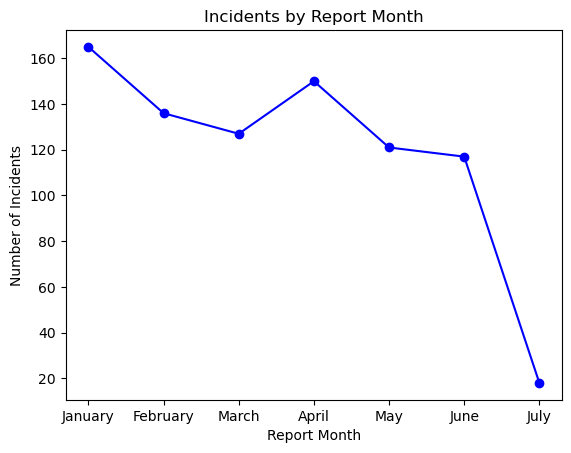

In [61]:

# create a DataFrame from the table
ndata = {'rptMonth': ['January', 'February', 'March', 'April', 'May', 'June', 'July'],
        'incidentID': [165, 136, 127, 150, 121, 117, 18]}
df = pd.DataFrame(ndata)
df = df.set_index('rptMonth')  # set the rptMonth column as the index

# create a line chart from the DataFrame
plt.plot(df.index, df['incidentID'], marker='o', color='blue')

# add labels and a title to the plot
plt.xlabel('Report Month')
plt.ylabel('Number of Incidents')
plt.title('Incidents by Report Month')

# show the plot
plt.show()


In [32]:
data.groupby(['region'])[['region']].count()

,region
region,
Caribbean,21
Central America,104
Eastern Africa,16
Europe,48
Mediterranean,145
Middle Africa,1
North America,171
Northern Africa,50
South America,25


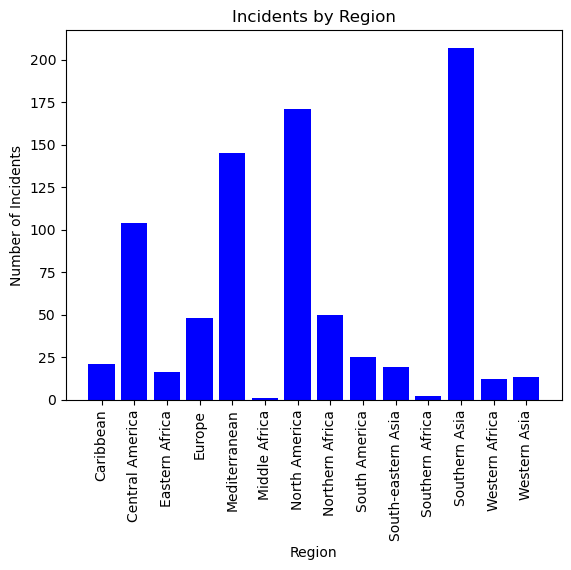

In [62]:
 # create a DataFrame from the table
data = {'region': ['Caribbean', 'Central America', 'Eastern Africa', 'Europe', 'Mediterranean', 'Middle Africa', 'North America', 'Northern Africa', 'South America', 'South-eastern Asia', 'Southern Africa', 'Southern Asia', 'Western Africa', 'Western Asia'],
        'count': [21, 104, 16, 48, 145, 1, 171, 50, 25, 19, 2, 207, 12, 13]}
df = pd.DataFrame(data)
df = df.set_index('region')  # set the region column as the index

# create a bar chart from the DataFrame
plt.bar(df.index, df['count'], color='blue')

# add labels and a title to the plot
plt.xlabel('Region')
plt.ylabel('Number of Incidents')
plt.title('Incidents by Region')

# rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# show the plot
plt.show()

In [12]:
dead = [207.0, 1.0, 2.0, 175.0, 4.0, 31.0, 19.0, 7.0, 2.0, 2.0, 7.0, 6.0, 69.0, 2.0, 27.0, 316.0, 10.0, 1.0, 242.0, 1.0, 40.0, 13.0, 63.0]
missing = [0.0, 0.0, 49.0, 634.0, 1.0, 49.0, 45.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 4.0, 14.0, 7.0, 1.0, 101.0, 0.0, 272.0, 4.0, 33.0]
arrived = [56.0, 0.0, 8.0, 2212.0, 2.0, 115.0, 550.0, 31.0, 7.0, 0.0, 2.0, 5.0, 23.0, 0.0, 35.0, 98.0, 32.0, 0.0, 1090.0, 19.0, 623.0, 34.0, 57.0]
labels = ['Afghanistan to Iran', 'Belarus-EU border', 'Caribbean to US', 'Central Mediterranean', 'Darien Gap', 'Dominican Republic to Puerto Rico', 'Eastern Mediterranean', 'English Channel to the UK', 'Haiti to Dominican Republic', 'Horn of Africa to Yemen crossing', 'Iran to Turkey', 'Italy to France', 'Sahara Desert crossing', 'Syria to Turkey', 'Turkey-Europe land route', 'US-Mexico border crossing', 'Ukraine to Europe', 'Undetermined', 'Unknown', 'Venezuela to Caribbean', 'Western Africa / Atlantic route to the Canary Islands', 'Western Balkans', 'Western Mediterranean']



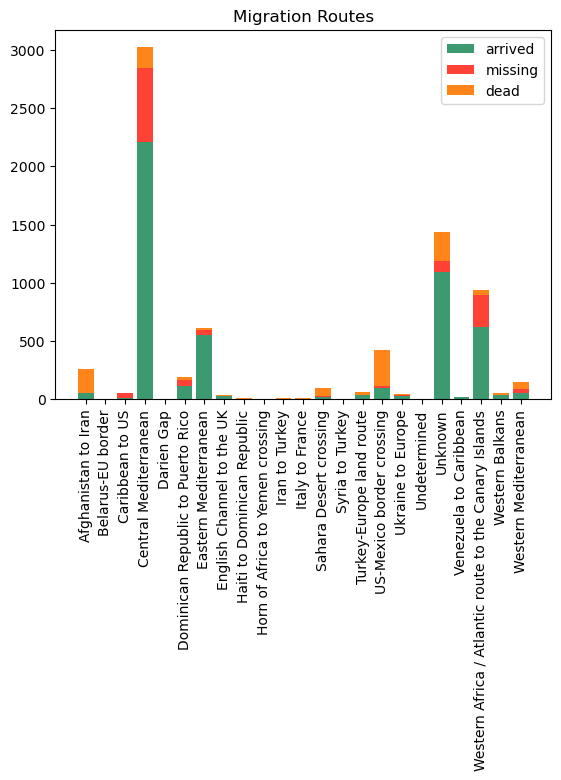

In [33]:
plt.bar(labels, arrived, color='#3D9970')
plt.bar(labels, missing, bottom=arrived, color='#FF4136')
plt.bar(labels, dead, bottom=[arrived[i]+missing[i] for i in range(len(arrived))], color='#FF851B')
plt.title('Migration Routes')
plt.xticks(rotation=90)

ax.set_xticklabels([])

plt.legend(['arrived', 'missing', 'dead']);


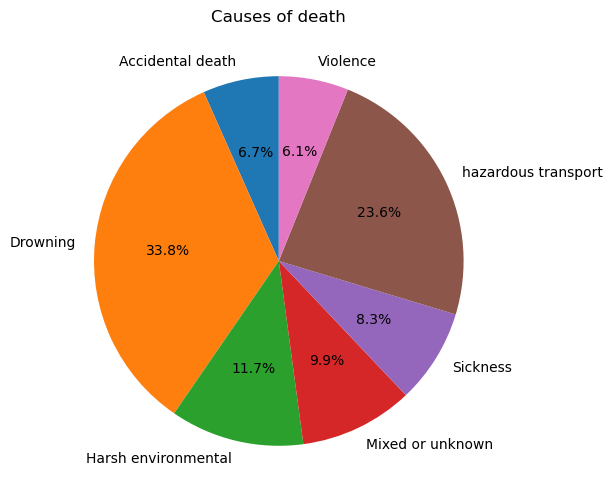

In [29]:


# Data
categories = ['Accidental death', 'Drowning', 'Harsh environmental', 'Mixed or unknown', 'Sickness', 'hazardous transport', 'Violence']
values = [83.0, 421.0, 146.0, 124.0, 103.0, 294.0, 76.0]

# Pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(values, labels=categories, autopct='%1.1f%%', startangle=90)

# Add title
ax.set_title('Causes of death')

plt.show()
